In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

#import packages
import sys
import pandas as pd
import os
import operator
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# from sklearn.externals import joblib

import time 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

import time 
import datetime


In [2]:
data=pd.read_csv('transactions_n100000.csv')
data

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234
...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,burger,3,41.524598,-87.849468
260737,0x3c0582,2019-05-27 17:06:00,9,salad,1,41.524598,-87.849468
260738,0x3c0582,2019-05-27 17:06:00,9,fries,4,41.524598,-87.849468
260739,0x104597,2019-12-10 00:25:00,2,burger,3,42.049306,-87.677606


In [3]:
date=data['order_timestamp']
data.drop('order_timestamp',axis=1,inplace=True)
ticket_id=data['ticket_id']
data.drop('ticket_id',axis=1,inplace=True)
data

,location,item_name,item_count,lat,long
0,4,shake,2,41.889047,-87.803605
1,4,burger,2,41.889047,-87.803605
2,4,fries,2,41.889047,-87.803605
3,5,burger,1,41.881818,-87.640234
4,5,salad,2,41.881818,-87.640234
...,...,...,...,...,...
260736,9,burger,3,41.524598,-87.849468
260737,9,salad,1,41.524598,-87.849468
260738,9,fries,4,41.524598,-87.849468
260739,2,burger,3,42.049306,-87.677606


In [4]:
data=pd.get_dummies(data)
data

,location,item_count,lat,long,item_name_burger,item_name_fries,item_name_salad,item_name_shake
0,4,2,41.889047,-87.803605,0,0,0,1
1,4,2,41.889047,-87.803605,1,0,0,0
2,4,2,41.889047,-87.803605,0,1,0,0
3,5,1,41.881818,-87.640234,1,0,0,0
4,5,2,41.881818,-87.640234,0,0,1,0
...,...,...,...,...,...,...,...,...
260736,9,3,41.524598,-87.849468,1,0,0,0
260737,9,1,41.524598,-87.849468,0,0,1,0
260738,9,4,41.524598,-87.849468,0,1,0,0
260739,2,3,42.049306,-87.677606,1,0,0,0


In [185]:
data

,ticket_id,time,location,item_count,lat,long,item_name_burger,item_name_fries,item_name_salad,item_name_shake
0,0x872a40,2019-02-28 18:33:00,4,2,41.889047,-87.803605,0,0,0,1
1,0x872a40,2019-02-28 18:33:00,4,2,41.889047,-87.803605,1,0,0,0
2,0x872a40,2019-02-28 18:33:00,4,2,41.889047,-87.803605,0,1,0,0
3,0x598eb3,2019-09-18 11:59:00,5,1,41.881818,-87.640234,1,0,0,0
4,0x598eb3,2019-09-18 11:59:00,5,2,41.881818,-87.640234,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,3,41.524598,-87.849468,1,0,0,0
260737,0x3c0582,2019-05-27 17:06:00,9,1,41.524598,-87.849468,0,0,1,0
260738,0x3c0582,2019-05-27 17:06:00,9,4,41.524598,-87.849468,0,1,0,0
260739,0x104597,2019-12-10 00:25:00,2,3,42.049306,-87.677606,1,0,0,0


In [5]:
data['time']=date
data['ticket_id']=ticket_id
data

,location,item_count,lat,long,item_name_burger,item_name_fries,item_name_salad,item_name_shake,time,ticket_id
0,4,2,41.889047,-87.803605,0,0,0,1,2019-02-28 18:33:00,0x872a40
1,4,2,41.889047,-87.803605,1,0,0,0,2019-02-28 18:33:00,0x872a40
2,4,2,41.889047,-87.803605,0,1,0,0,2019-02-28 18:33:00,0x872a40
3,5,1,41.881818,-87.640234,1,0,0,0,2019-09-18 11:59:00,0x598eb3
4,5,2,41.881818,-87.640234,0,0,1,0,2019-09-18 11:59:00,0x598eb3
...,...,...,...,...,...,...,...,...,...,...
260736,9,3,41.524598,-87.849468,1,0,0,0,2019-05-27 17:06:00,0x3c0582
260737,9,1,41.524598,-87.849468,0,0,1,0,2019-05-27 17:06:00,0x3c0582
260738,9,4,41.524598,-87.849468,0,1,0,0,2019-05-27 17:06:00,0x3c0582
260739,2,3,42.049306,-87.677606,1,0,0,0,2019-12-10 00:25:00,0x104597


In [6]:
data = data.reindex(columns=['ticket_id','time','location','item_count','lat','long','item_name_burger','item_name_fries','item_name_salad','item_name_shake'])
data

,ticket_id,time,location,item_count,lat,long,item_name_burger,item_name_fries,item_name_salad,item_name_shake
0,0x872a40,2019-02-28 18:33:00,4,2,41.889047,-87.803605,0,0,0,1
1,0x872a40,2019-02-28 18:33:00,4,2,41.889047,-87.803605,1,0,0,0
2,0x872a40,2019-02-28 18:33:00,4,2,41.889047,-87.803605,0,1,0,0
3,0x598eb3,2019-09-18 11:59:00,5,1,41.881818,-87.640234,1,0,0,0
4,0x598eb3,2019-09-18 11:59:00,5,2,41.881818,-87.640234,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,3,41.524598,-87.849468,1,0,0,0
260737,0x3c0582,2019-05-27 17:06:00,9,1,41.524598,-87.849468,0,0,1,0
260738,0x3c0582,2019-05-27 17:06:00,9,4,41.524598,-87.849468,0,1,0,0
260739,0x104597,2019-12-10 00:25:00,2,3,42.049306,-87.677606,1,0,0,0


In [7]:
data['ticket_id'].value_counts()

0x987c04    4
0x813b06    4
0x142021    4
0x451ffa    4
0x95a06f    4
           ..
0x4c2234    2
0x4c2c57    2
0x38050b    2
0x49ce1b    2
0x377794    2
Name: ticket_id, Length: 100000, dtype: int64

In [8]:
x=data['ticket_id'].unique()
x

array(['0x872a40', '0x598eb3', '0x5646c2', ..., '0x4e2756', '0x3c0582',
       '0x104597'], dtype=object)

In [11]:
group=data['ticket_id']==x[3]
datagroup=data[group]
data[group]['time']
dgroup.index[0]

NameError: name 'dgroup' is not defined

In [15]:
ticket=[]
timel=[]
item_count=[]
loc=[]
burger=[]
fries=[]
salad=[]
shake=[]
flag=0
import time
start=time.time()
for i in x:
    group=data['ticket_id']==i
    #print(data[group])
    dgroup=data[group]
   # print(i,sum(dgroup['item_count']))
   # print(i,dgroup['time'].unique())
    ticket+=[str(dgroup['ticket_id'].unique())]
    #timel+=[dgroup['time'].unique()]
    ind=dgroup['time'].index
    timel+=[dgroup['time'][ind[0]]]
    loc+=[dgroup['location'].unique()]
    item_count+=[sum(dgroup['item_count'])]
    burger+=[sum(dgroup['item_name_burger'])]
    fries+=[sum(dgroup['item_name_fries'])]
    salad+=[sum(dgroup['item_name_salad'])]
    shake+=[sum(dgroup['item_name_shake'])]
    flag+=1
    if flag%10000==0:
        print(flag)
        end=time.time()
        print('run time is:',(end-start)/60)
    if flag==1000:
        print(flag)
        end=time.time()
        print('run time is:',end-start)

    

1000
run time is: 18.807345151901245
10000
run time is: 3.1202568809191384
20000
run time is: 5.858676314353943
30000
run time is: 8.884599216779073
40000
run time is: 11.728802680969238
50000
run time is: 14.350927865505218
60000
run time is: 17.030385184288026
70000
run time is: 19.817960782845816
80000
run time is: 22.39964606364568
90000
run time is: 25.070662148793538
100000
run time is: 27.80255655050278


In [16]:
ticket

["['0x872a40']",
 "['0x598eb3']",
 "['0x5646c2']",
 "['0x4022cf']",
 "['0x7a39d9']",
 "['0x812cb8']",
 "['0x2d1b63']",
 "['0x708ff0']",
 "['0x69356d']",
 "['0x50a86b']",
 "['0x1eef23']",
 "['0x7acc40']",
 "['0x23eaa7']",
 "['0x96a841']",
 "['0x7dfc2b']",
 "['0x5fcd54']",
 "['0x7d60e0']",
 "['0x23706d']",
 "['0x65eb9b']",
 "['0x18b7c1']",
 "['0x79115f']",
 "['0x6ebb5e']",
 "['0x63f3c5']",
 "['0x75a051']",
 "['0x90888b']",
 "['0x1232c7']",
 "['0x5a597d']",
 "['0x22c24f']",
 "['0x43efe0']",
 "['0x7c2b05']",
 "['0x325b87']",
 "['0x7c534e']",
 "['0x21406a']",
 "['0x194095']",
 "['0x1fa90e']",
 "['0x6ecde1']",
 "['0x305a8e']",
 "['0x14839b']",
 "['0x135cb1']",
 "['0x1fac75']",
 "['0x2eacdb']",
 "['0x411369']",
 "['0x8b83a5']",
 "['0x34a777']",
 "['0x186afa']",
 "['0x2b3f26']",
 "['0x80e617']",
 "['0x81c78e']",
 "['0x1cf7c6']",
 "['0xfa651']",
 "['0x6420b4']",
 "['0x135660']",
 "['0x5961c9']",
 "['0x5f936c']",
 "['0x7241d3']",
 "['0x1cbff7']",
 "['0x5e8c77']",
 "['0x48b24e']",
 "['0x4bc5a5']"

In [17]:
dic={'ticket_id':ticket,
     'time':timel,
     'location':loc,
     'item_count':item_count,
     'burger':burger,
     'fries':fries,
     'salad':salad,
     'shake':shake}
df=pd.DataFrame(dic)
df

,ticket_id,time,location,item_count,burger,fries,salad,shake
0,['0x872a40'],2019-02-28 18:33:00,[4],6,1,1,0,1
1,['0x598eb3'],2019-09-18 11:59:00,[5],6,1,1,1,0
2,['0x5646c2'],2019-09-21 12:40:00,[3],6,0,1,1,0
3,['0x4022cf'],2019-09-21 12:25:00,[4],8,0,1,1,0
4,['0x7a39d9'],2019-09-05 17:21:00,[7],15,1,1,0,1
...,...,...,...,...,...,...,...,...
99995,['0x75c9e7'],2019-10-27 01:17:00,[6],4,1,1,0,0
99996,['0x66f1df'],2019-10-05 23:59:00,[6],2,1,1,0,0
99997,['0x4e2756'],2019-10-12 16:29:00,[8],12,1,1,0,1
99998,['0x3c0582'],2019-05-27 17:06:00,[9],11,1,1,1,1


In [18]:
df['location']=df['location'].astype(int)
df['ticket_id']=df['ticket_id'].astype(str)

df

,ticket_id,time,location,item_count,burger,fries,salad,shake
0,['0x872a40'],2019-02-28 18:33:00,4,6,1,1,0,1
1,['0x598eb3'],2019-09-18 11:59:00,5,6,1,1,1,0
2,['0x5646c2'],2019-09-21 12:40:00,3,6,0,1,1,0
3,['0x4022cf'],2019-09-21 12:25:00,4,8,0,1,1,0
4,['0x7a39d9'],2019-09-05 17:21:00,7,15,1,1,0,1
...,...,...,...,...,...,...,...,...
99995,['0x75c9e7'],2019-10-27 01:17:00,6,4,1,1,0,0
99996,['0x66f1df'],2019-10-05 23:59:00,6,2,1,1,0,0
99997,['0x4e2756'],2019-10-12 16:29:00,8,12,1,1,0,1
99998,['0x3c0582'],2019-05-27 17:06:00,9,11,1,1,1,1


In [19]:
df['time']
df=df.sort_values(by=['time'])
df

,ticket_id,time,location,item_count,burger,fries,salad,shake
89726,['0x8ebc0d'],2019-01-01 00:02:00,6,2,1,1,0,0
57548,['0x2657c7'],2019-01-01 00:05:00,2,4,1,1,0,0
59320,['0x687689'],2019-01-01 00:06:00,6,5,1,1,0,1
73112,['0x258d47'],2019-01-01 00:07:00,6,12,1,1,0,1
9043,['0x48cdcb'],2019-01-01 00:08:00,6,2,1,1,0,0
...,...,...,...,...,...,...,...,...
92645,['0x50ae5b'],2019-12-30 23:48:00,5,2,0,1,1,0
16270,['0x4126f0'],2019-12-30 23:48:00,2,2,1,1,0,0
9940,['0x64f7c8'],2019-12-30 23:49:00,6,4,1,1,0,0
43232,['0x3098fd'],2019-12-30 23:49:00,6,2,1,1,0,0


In [20]:
date=pd.to_datetime(df['time'], utc=False)
df['time']=date
df

,ticket_id,time,location,item_count,burger,fries,salad,shake
89726,['0x8ebc0d'],2019-01-01 00:02:00,6,2,1,1,0,0
57548,['0x2657c7'],2019-01-01 00:05:00,2,4,1,1,0,0
59320,['0x687689'],2019-01-01 00:06:00,6,5,1,1,0,1
73112,['0x258d47'],2019-01-01 00:07:00,6,12,1,1,0,1
9043,['0x48cdcb'],2019-01-01 00:08:00,6,2,1,1,0,0
...,...,...,...,...,...,...,...,...
92645,['0x50ae5b'],2019-12-30 23:48:00,5,2,0,1,1,0
16270,['0x4126f0'],2019-12-30 23:48:00,2,2,1,1,0,0
9940,['0x64f7c8'],2019-12-30 23:49:00,6,4,1,1,0,0
43232,['0x3098fd'],2019-12-30 23:49:00,6,2,1,1,0,0


In [21]:
df['date'] = pd.to_datetime(df.time)
df['date'] = df['date'].dt.date
weekdays=[]
for i in df['date']:
    #print(i)
    weekday=i.weekday()
    weekdays.append(weekday)
df['weekday']=weekdays
df['weekday']=df['weekday']
df

,ticket_id,time,location,item_count,burger,fries,salad,shake,date,weekday
89726,['0x8ebc0d'],2019-01-01 00:02:00,6,2,1,1,0,0,2019-01-01,1
57548,['0x2657c7'],2019-01-01 00:05:00,2,4,1,1,0,0,2019-01-01,1
59320,['0x687689'],2019-01-01 00:06:00,6,5,1,1,0,1,2019-01-01,1
73112,['0x258d47'],2019-01-01 00:07:00,6,12,1,1,0,1,2019-01-01,1
9043,['0x48cdcb'],2019-01-01 00:08:00,6,2,1,1,0,0,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...
92645,['0x50ae5b'],2019-12-30 23:48:00,5,2,0,1,1,0,2019-12-30,0
16270,['0x4126f0'],2019-12-30 23:48:00,2,2,1,1,0,0,2019-12-30,0
9940,['0x64f7c8'],2019-12-30 23:49:00,6,4,1,1,0,0,2019-12-30,0
43232,['0x3098fd'],2019-12-30 23:49:00,6,2,1,1,0,0,2019-12-30,0


In [22]:
#df['time'][89726].time()
#df['hour']=df['time'].time
#df
hour=[]
for i in df['time']:
    #print(i.time())
    hour.append(i.time())
df['hour']=hour
df

,ticket_id,time,location,item_count,burger,fries,salad,shake,date,weekday,hour
89726,['0x8ebc0d'],2019-01-01 00:02:00,6,2,1,1,0,0,2019-01-01,1,00:02:00
57548,['0x2657c7'],2019-01-01 00:05:00,2,4,1,1,0,0,2019-01-01,1,00:05:00
59320,['0x687689'],2019-01-01 00:06:00,6,5,1,1,0,1,2019-01-01,1,00:06:00
73112,['0x258d47'],2019-01-01 00:07:00,6,12,1,1,0,1,2019-01-01,1,00:07:00
9043,['0x48cdcb'],2019-01-01 00:08:00,6,2,1,1,0,0,2019-01-01,1,00:08:00
...,...,...,...,...,...,...,...,...,...,...,...
92645,['0x50ae5b'],2019-12-30 23:48:00,5,2,0,1,1,0,2019-12-30,0,23:48:00
16270,['0x4126f0'],2019-12-30 23:48:00,2,2,1,1,0,0,2019-12-30,0,23:48:00
9940,['0x64f7c8'],2019-12-30 23:49:00,6,4,1,1,0,0,2019-12-30,0,23:49:00
43232,['0x3098fd'],2019-12-30 23:49:00,6,2,1,1,0,0,2019-12-30,0,23:49:00


In [23]:
break_time=round(len(df)*0.7)
df[:break_time]
train_set=df[:break_time]
test_set=df[break_time:]
train_set

,ticket_id,time,location,item_count,burger,fries,salad,shake,date,weekday,hour
89726,['0x8ebc0d'],2019-01-01 00:02:00,6,2,1,1,0,0,2019-01-01,1,00:02:00
57548,['0x2657c7'],2019-01-01 00:05:00,2,4,1,1,0,0,2019-01-01,1,00:05:00
59320,['0x687689'],2019-01-01 00:06:00,6,5,1,1,0,1,2019-01-01,1,00:06:00
73112,['0x258d47'],2019-01-01 00:07:00,6,12,1,1,0,1,2019-01-01,1,00:07:00
9043,['0x48cdcb'],2019-01-01 00:08:00,6,2,1,1,0,0,2019-01-01,1,00:08:00
...,...,...,...,...,...,...,...,...,...,...,...
92159,['0x60eb9e'],2019-09-12 20:09:00,8,6,1,1,0,1,2019-09-12,3,20:09:00
53680,['0x376625'],2019-09-12 20:20:00,7,12,1,1,0,1,2019-09-12,3,20:20:00
61008,['0x737ce4'],2019-09-12 20:21:00,4,5,1,1,1,1,2019-09-12,3,20:21:00
84026,['0x155b9a'],2019-09-12 20:22:00,8,12,1,1,0,1,2019-09-12,3,20:22:00


In [24]:
data_id_train=train_set['ticket_id']
data_time=train_set['time']
data_time_test=test_set['time']

x=train_set
x=x.drop('ticket_id',axis=1)


data_id_test=test_set['ticket_id']
x_test=test_set
x_test=x_test.drop('ticket_id',axis=1)
x_test

,time,location,item_count,burger,fries,salad,shake,date,weekday,hour
53536,2019-09-12 20:37:00,1,6,0,1,1,0,2019-09-12,3,20:37:00
8973,2019-09-12 20:52:00,8,6,0,1,1,0,2019-09-12,3,20:52:00
65481,2019-09-12 22:11:00,3,2,0,1,1,0,2019-09-12,3,22:11:00
3423,2019-09-12 23:05:00,6,2,1,1,0,0,2019-09-12,3,23:05:00
30985,2019-09-12 23:22:00,2,6,1,1,0,0,2019-09-12,3,23:22:00
...,...,...,...,...,...,...,...,...,...,...
92645,2019-12-30 23:48:00,5,2,0,1,1,0,2019-12-30,0,23:48:00
16270,2019-12-30 23:48:00,2,2,1,1,0,0,2019-12-30,0,23:48:00
9940,2019-12-30 23:49:00,6,4,1,1,0,0,2019-12-30,0,23:49:00
43232,2019-12-30 23:49:00,6,2,1,1,0,0,2019-12-30,0,23:49:00


In [25]:
x_test=x_test.drop('time',axis=1)
x=x.drop('time',axis=1)
x

,location,item_count,burger,fries,salad,shake,date,weekday,hour
89726,6,2,1,1,0,0,2019-01-01,1,00:02:00
57548,2,4,1,1,0,0,2019-01-01,1,00:05:00
59320,6,5,1,1,0,1,2019-01-01,1,00:06:00
73112,6,12,1,1,0,1,2019-01-01,1,00:07:00
9043,6,2,1,1,0,0,2019-01-01,1,00:08:00
...,...,...,...,...,...,...,...,...,...
92159,8,6,1,1,0,1,2019-09-12,3,20:09:00
53680,7,12,1,1,0,1,2019-09-12,3,20:20:00
61008,4,5,1,1,1,1,2019-09-12,3,20:21:00
84026,8,12,1,1,0,1,2019-09-12,3,20:22:00


In [26]:
data_time=train_set['time']
data_time_test=test_set['time']

date=train_set['date']
date_test=test_set['date']

weekday=train_set['weekday']
weekday_test=test_set['weekday']

hour=train_set['hour']
hour_test=test_set['hour']

x_test=x_test.drop('date',axis=1)
x=x.drop('date',axis=1)

x_test=x_test.drop('weekday',axis=1)
x=x.drop('weekday',axis=1)

x_test=x_test.drop('hour',axis=1)
x=x.drop('hour',axis=1)

In [27]:
x

,location,item_count,burger,fries,salad,shake
89726,6,2,1,1,0,0
57548,2,4,1,1,0,0
59320,6,5,1,1,0,1
73112,6,12,1,1,0,1
9043,6,2,1,1,0,0
...,...,...,...,...,...,...
92159,8,6,1,1,0,1
53680,7,12,1,1,0,1
61008,4,5,1,1,1,1
84026,8,12,1,1,0,1


In [22]:
#what to standardize

In [28]:
from sklearn.preprocessing import StandardScaler as st
x_normalized=st().fit(x).transform(x)
xc=pd.DataFrame(x_normalized)
xc

,0,1,2,3,4,5
0,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000
1,-1.175264,-0.597503,0.562326,0.0,-0.789018,-0.927000
2,0.393802,-0.346314,0.562326,0.0,-0.789018,1.078749
3,0.393802,1.412007,0.562326,0.0,-0.789018,1.078749
4,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000
...,...,...,...,...,...,...
69995,1.178335,-0.095125,0.562326,0.0,-0.789018,1.078749
69996,0.786068,1.412007,0.562326,0.0,-0.789018,1.078749
69997,-0.390731,-0.346314,0.562326,0.0,1.267399,1.078749
69998,1.178335,1.412007,0.562326,0.0,-0.789018,1.078749


In [29]:
xc

,0,1,2,3,4,5
0,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000
1,-1.175264,-0.597503,0.562326,0.0,-0.789018,-0.927000
2,0.393802,-0.346314,0.562326,0.0,-0.789018,1.078749
3,0.393802,1.412007,0.562326,0.0,-0.789018,1.078749
4,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000
...,...,...,...,...,...,...
69995,1.178335,-0.095125,0.562326,0.0,-0.789018,1.078749
69996,0.786068,1.412007,0.562326,0.0,-0.789018,1.078749
69997,-0.390731,-0.346314,0.562326,0.0,1.267399,1.078749
69998,1.178335,1.412007,0.562326,0.0,-0.789018,1.078749


In [30]:
from sklearn.preprocessing import StandardScaler as st
x_normalized=st().fit(x).transform(x)
xc=pd.DataFrame(x_normalized)
xc

,0,1,2,3,4,5
0,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000
1,-1.175264,-0.597503,0.562326,0.0,-0.789018,-0.927000
2,0.393802,-0.346314,0.562326,0.0,-0.789018,1.078749
3,0.393802,1.412007,0.562326,0.0,-0.789018,1.078749
4,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000
...,...,...,...,...,...,...
69995,1.178335,-0.095125,0.562326,0.0,-0.789018,1.078749
69996,0.786068,1.412007,0.562326,0.0,-0.789018,1.078749
69997,-0.390731,-0.346314,0.562326,0.0,1.267399,1.078749
69998,1.178335,1.412007,0.562326,0.0,-0.789018,1.078749


In [31]:
xc.columns=['location',
            'item_count',
            'burger',
            'fries',
            'salad',
            'shake']

In [32]:
xc

,location,item_count,burger,fries,salad,shake
0,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000
1,-1.175264,-0.597503,0.562326,0.0,-0.789018,-0.927000
2,0.393802,-0.346314,0.562326,0.0,-0.789018,1.078749
3,0.393802,1.412007,0.562326,0.0,-0.789018,1.078749
4,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000
...,...,...,...,...,...,...
69995,1.178335,-0.095125,0.562326,0.0,-0.789018,1.078749
69996,0.786068,1.412007,0.562326,0.0,-0.789018,1.078749
69997,-0.390731,-0.346314,0.562326,0.0,1.267399,1.078749
69998,1.178335,1.412007,0.562326,0.0,-0.789018,1.078749


In [33]:
x_test_normal=st().fit(x).transform(x_test)
xct=pd.DataFrame(x_test_normal)
xct

,0,1,2,3,4,5
0,-1.567530,-0.095125,-1.778329,0.0,1.267399,-0.927
1,1.178335,-0.095125,-1.778329,0.0,1.267399,-0.927
2,-0.782997,-1.099880,-1.778329,0.0,1.267399,-0.927
3,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927
4,-1.175264,-0.095125,0.562326,0.0,-0.789018,-0.927
...,...,...,...,...,...,...
29995,0.001535,-1.099880,-1.778329,0.0,1.267399,-0.927
29996,-1.175264,-1.099880,0.562326,0.0,-0.789018,-0.927
29997,0.393802,-0.597503,0.562326,0.0,-0.789018,-0.927
29998,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927


In [34]:
xct.columns=['location',
             'item_count',
             'burger',
             'fries',
             'salad',
             'shake']
xct

,location,item_count,burger,fries,salad,shake
0,-1.567530,-0.095125,-1.778329,0.0,1.267399,-0.927
1,1.178335,-0.095125,-1.778329,0.0,1.267399,-0.927
2,-0.782997,-1.099880,-1.778329,0.0,1.267399,-0.927
3,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927
4,-1.175264,-0.095125,0.562326,0.0,-0.789018,-0.927
...,...,...,...,...,...,...
29995,0.001535,-1.099880,-1.778329,0.0,1.267399,-0.927
29996,-1.175264,-1.099880,0.562326,0.0,-0.789018,-0.927
29997,0.393802,-0.597503,0.562326,0.0,-0.789018,-0.927
29998,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927


In [35]:
xct

,location,item_count,burger,fries,salad,shake
0,-1.567530,-0.095125,-1.778329,0.0,1.267399,-0.927
1,1.178335,-0.095125,-1.778329,0.0,1.267399,-0.927
2,-0.782997,-1.099880,-1.778329,0.0,1.267399,-0.927
3,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927
4,-1.175264,-0.095125,0.562326,0.0,-0.789018,-0.927
...,...,...,...,...,...,...
29995,0.001535,-1.099880,-1.778329,0.0,1.267399,-0.927
29996,-1.175264,-1.099880,0.562326,0.0,-0.789018,-0.927
29997,0.393802,-0.597503,0.562326,0.0,-0.789018,-0.927
29998,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927


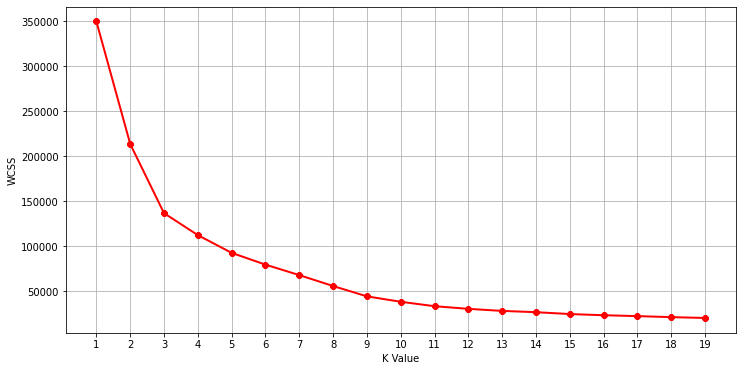

In [36]:

from sklearn.cluster import KMeans
wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    clust=kmeans.fit_predict(xc)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,20),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,20,1))
plt.ylabel("WCSS")
plt.show()

In [37]:
# k means
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=0)
clust=kmeans.fit_predict(xc)
silhouette_avg = silhouette_score(xc, clust)
print('score for train_set:',silhouette_avg)
xc['cluster']=clust

# get centroids
centroids = kmeans.cluster_centers_
#score for train: 0.4390529467222094

score for train_set: 0.4390529467222094


In [38]:
clust_test=kmeans.predict(xct)
silhouette_avg2 = silhouette_score(xct, clust_test)
print('score for test_set:',silhouette_avg2)

clust_test

#score for test: 0.4374425590401832

score for test_set: 0.4374425590401832


array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [39]:
xct['cluster']=clust_test
xct

,location,item_count,burger,fries,salad,shake,cluster
0,-1.567530,-0.095125,-1.778329,0.0,1.267399,-0.927,2
1,1.178335,-0.095125,-1.778329,0.0,1.267399,-0.927,2
2,-0.782997,-1.099880,-1.778329,0.0,1.267399,-0.927,2
3,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927,0
4,-1.175264,-0.095125,0.562326,0.0,-0.789018,-0.927,0
...,...,...,...,...,...,...,...
29995,0.001535,-1.099880,-1.778329,0.0,1.267399,-0.927,2
29996,-1.175264,-1.099880,0.562326,0.0,-0.789018,-0.927,0
29997,0.393802,-0.597503,0.562326,0.0,-0.789018,-0.927,0
29998,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927,0


In [40]:
train_set

,ticket_id,time,location,item_count,burger,fries,salad,shake,date,weekday,hour
89726,['0x8ebc0d'],2019-01-01 00:02:00,6,2,1,1,0,0,2019-01-01,1,00:02:00
57548,['0x2657c7'],2019-01-01 00:05:00,2,4,1,1,0,0,2019-01-01,1,00:05:00
59320,['0x687689'],2019-01-01 00:06:00,6,5,1,1,0,1,2019-01-01,1,00:06:00
73112,['0x258d47'],2019-01-01 00:07:00,6,12,1,1,0,1,2019-01-01,1,00:07:00
9043,['0x48cdcb'],2019-01-01 00:08:00,6,2,1,1,0,0,2019-01-01,1,00:08:00
...,...,...,...,...,...,...,...,...,...,...,...
92159,['0x60eb9e'],2019-09-12 20:09:00,8,6,1,1,0,1,2019-09-12,3,20:09:00
53680,['0x376625'],2019-09-12 20:20:00,7,12,1,1,0,1,2019-09-12,3,20:20:00
61008,['0x737ce4'],2019-09-12 20:21:00,4,5,1,1,1,1,2019-09-12,3,20:21:00
84026,['0x155b9a'],2019-09-12 20:22:00,8,12,1,1,0,1,2019-09-12,3,20:22:00


In [41]:
train_set['cluster']=clust
test_set['cluster']=clust_test
test_set

<ipython-input-41-4cc08381bb99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['cluster']=clust
<ipython-input-41-4cc08381bb99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['cluster']=clust_test


,ticket_id,time,location,item_count,burger,fries,salad,shake,date,weekday,hour,cluster
53536,['0x58aa2c'],2019-09-12 20:37:00,1,6,0,1,1,0,2019-09-12,3,20:37:00,2
8973,['0x28fde5'],2019-09-12 20:52:00,8,6,0,1,1,0,2019-09-12,3,20:52:00,2
65481,['0x14d706'],2019-09-12 22:11:00,3,2,0,1,1,0,2019-09-12,3,22:11:00,2
3423,['0x20fbc0'],2019-09-12 23:05:00,6,2,1,1,0,0,2019-09-12,3,23:05:00,0
30985,['0x84b93a'],2019-09-12 23:22:00,2,6,1,1,0,0,2019-09-12,3,23:22:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
92645,['0x50ae5b'],2019-12-30 23:48:00,5,2,0,1,1,0,2019-12-30,0,23:48:00,2
16270,['0x4126f0'],2019-12-30 23:48:00,2,2,1,1,0,0,2019-12-30,0,23:48:00,0
9940,['0x64f7c8'],2019-12-30 23:49:00,6,4,1,1,0,0,2019-12-30,0,23:49:00,0
43232,['0x3098fd'],2019-12-30 23:49:00,6,2,1,1,0,0,2019-12-30,0,23:49:00,0


In [42]:
kmeans.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [43]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
colors

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1),
 'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagr

In [44]:
c=[]
flag=0
for i in colors.values():
    c=c+[i]
    flag+=1
    if flag==3:
        break

In [45]:
dic={}
for i in range(0,3):
    dic[i]=c[i]

In [46]:
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
dic={}
d={}
d2={}
for i in range(0,3):
    d[i]=cen_x[i]
    d2[i]=cen_y[i]

xc['cen_x']=xc.cluster.map(d)
xc['cen_y']=xc.cluster.map(d2)
#data['cen_x'] = data.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
#data['cen_y'] = data.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']

dic={}
for i in range(0,3):
    dic[i]=colors[i]

xc['c']=xc.cluster.map(dic)

In [47]:
cen_x

[-0.32764049901849174, 0.3265292486610707, -0.17984430357153589]

In [117]:
xc

,location,item_count,burger,fries,salad,shake,cluster,cen_x,cen_y,c
0,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000,0,-0.327640,-0.701138,#DF2020
1,-1.175264,-0.597503,0.562326,0.0,-0.789018,-0.927000,0,-0.327640,-0.701138,#DF2020
2,0.393802,-0.346314,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
3,0.393802,1.412007,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
4,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000,0,-0.327640,-0.701138,#DF2020
...,...,...,...,...,...,...,...,...,...,...
69995,1.178335,-0.095125,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
69996,0.786068,1.412007,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
69997,-0.390731,-0.346314,0.562326,0.0,1.267399,1.078749,1,0.326529,0.800460,#81DF20
69998,1.178335,1.412007,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20


In [49]:
train_set

,ticket_id,time,location,item_count,burger,fries,salad,shake,date,weekday,hour,cluster
89726,['0x8ebc0d'],2019-01-01 00:02:00,6,2,1,1,0,0,2019-01-01,1,00:02:00,0
57548,['0x2657c7'],2019-01-01 00:05:00,2,4,1,1,0,0,2019-01-01,1,00:05:00,0
59320,['0x687689'],2019-01-01 00:06:00,6,5,1,1,0,1,2019-01-01,1,00:06:00,1
73112,['0x258d47'],2019-01-01 00:07:00,6,12,1,1,0,1,2019-01-01,1,00:07:00,1
9043,['0x48cdcb'],2019-01-01 00:08:00,6,2,1,1,0,0,2019-01-01,1,00:08:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
92159,['0x60eb9e'],2019-09-12 20:09:00,8,6,1,1,0,1,2019-09-12,3,20:09:00,1
53680,['0x376625'],2019-09-12 20:20:00,7,12,1,1,0,1,2019-09-12,3,20:20:00,1
61008,['0x737ce4'],2019-09-12 20:21:00,4,5,1,1,1,1,2019-09-12,3,20:21:00,1
84026,['0x155b9a'],2019-09-12 20:22:00,8,12,1,1,0,1,2019-09-12,3,20:22:00,1


In [50]:
xc.c

0        #DF2020
1        #DF2020
2        #81DF20
3        #81DF20
4        #DF2020
          ...   
69995    #81DF20
69996    #81DF20
69997    #81DF20
69998    #81DF20
69999    #81DF20
Name: c, Length: 70000, dtype: object

In [142]:
train_set['location'].value_counts()

2    10974
6    10934
4     7961
9     7933
7     7804
8     6333
3     6134
1     6099
5     5828
Name: location, dtype: int64

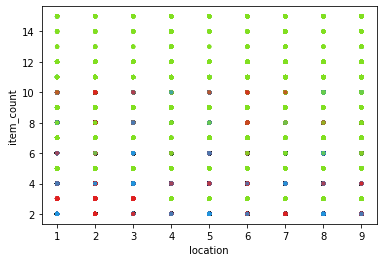

In [145]:
import matplotlib.pyplot as plt
plt.scatter(train_set['location'], train_set['item_count'], c=xc.c, alpha = 0.6, s=10)
plt.xlabel('location')
plt.ylabel('item_count')
plt.show()

In [132]:
xb=xc.drop('c', axis=1)
xb=xb.drop('cen_x',axis=1)
xb=xb.drop('cen_y',axis=1)
xb=xb.drop('cluster',axis=1)
xb

,location,item_count,burger,fries,salad,shake
0,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000
1,-1.175264,-0.597503,0.562326,0.0,-0.789018,-0.927000
2,0.393802,-0.346314,0.562326,0.0,-0.789018,1.078749
3,0.393802,1.412007,0.562326,0.0,-0.789018,1.078749
4,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000
...,...,...,...,...,...,...
69995,1.178335,-0.095125,0.562326,0.0,-0.789018,1.078749
69996,0.786068,1.412007,0.562326,0.0,-0.789018,1.078749
69997,-0.390731,-0.346314,0.562326,0.0,1.267399,1.078749
69998,1.178335,1.412007,0.562326,0.0,-0.789018,1.078749


In [130]:
clust

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(xb)
x_pca

array([[ 0.26355019, -1.13279894],
       [ 0.3908182 , -1.76482485],
       [-1.1516043 , -0.35310873],
       ...,
       [-0.06594342,  0.32250854],
       [-2.11442226,  0.87180658],
       [-1.64996027, -0.10105771]])

In [134]:
x_pca=pd.DataFrame(x_pca)
x_pca

,0,1
0,0.263550,-1.132799
1,0.390818,-1.764825
2,-1.151604,-0.353109
3,-1.938390,0.442181
4,0.263550,-1.132799
...,...,...
69995,-1.440034,0.190130
69996,-2.026406,0.656994
69997,-0.065943,0.322509
69998,-2.114422,0.871807


In [138]:
xc

,location,item_count,burger,fries,salad,shake,cluster,cen_x,cen_y,c
0,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000,0,-0.327640,-0.701138,#DF2020
1,-1.175264,-0.597503,0.562326,0.0,-0.789018,-0.927000,0,-0.327640,-0.701138,#DF2020
2,0.393802,-0.346314,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
3,0.393802,1.412007,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
4,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000,0,-0.327640,-0.701138,#DF2020
...,...,...,...,...,...,...,...,...,...,...
69995,1.178335,-0.095125,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
69996,0.786068,1.412007,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
69997,-0.390731,-0.346314,0.562326,0.0,1.267399,1.078749,1,0.326529,0.800460,#81DF20
69998,1.178335,1.412007,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20


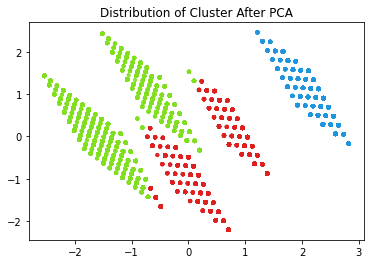

In [137]:
plt.title('Distribution of Cluster After PCA')
plt.scatter(x_pca[0], x_pca[1], c=xc.c, alpha = 0.6, s=10)
plt.show()

In [119]:
xc

,location,item_count,burger,fries,salad,shake,cluster,cen_x,cen_y,c
0,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000,0,-0.327640,-0.701138,#DF2020
1,-1.175264,-0.597503,0.562326,0.0,-0.789018,-0.927000,0,-0.327640,-0.701138,#DF2020
2,0.393802,-0.346314,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
3,0.393802,1.412007,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
4,0.393802,-1.099880,0.562326,0.0,-0.789018,-0.927000,0,-0.327640,-0.701138,#DF2020
...,...,...,...,...,...,...,...,...,...,...
69995,1.178335,-0.095125,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
69996,0.786068,1.412007,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20
69997,-0.390731,-0.346314,0.562326,0.0,1.267399,1.078749,1,0.326529,0.800460,#81DF20
69998,1.178335,1.412007,0.562326,0.0,-0.789018,1.078749,1,0.326529,0.800460,#81DF20


In [53]:
seg1=train_set.loc[train_set['cluster']==0]
seg2=train_set.loc[train_set['cluster']==1]
seg3=train_set.loc[train_set['cluster']==2]
seg2

,ticket_id,time,location,item_count,burger,fries,salad,shake,date,weekday,hour,cluster
59320,['0x687689'],2019-01-01 00:06:00,6,5,1,1,0,1,2019-01-01,1,00:06:00,1
73112,['0x258d47'],2019-01-01 00:07:00,6,12,1,1,0,1,2019-01-01,1,00:07:00,1
92957,['0x610f5b'],2019-01-01 00:09:00,2,9,1,1,0,1,2019-01-01,1,00:09:00,1
70431,['0x5100ac'],2019-01-01 00:10:00,2,9,1,1,0,1,2019-01-01,1,00:10:00,1
35942,['0x277fba'],2019-01-01 00:15:00,8,10,1,1,1,0,2019-01-01,1,00:15:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
92159,['0x60eb9e'],2019-09-12 20:09:00,8,6,1,1,0,1,2019-09-12,3,20:09:00,1
53680,['0x376625'],2019-09-12 20:20:00,7,12,1,1,0,1,2019-09-12,3,20:20:00,1
61008,['0x737ce4'],2019-09-12 20:21:00,4,5,1,1,1,1,2019-09-12,3,20:21:00,1
84026,['0x155b9a'],2019-09-12 20:22:00,8,12,1,1,0,1,2019-09-12,3,20:22:00,1


In [174]:
seg1t=test_set.loc[test_set['cluster']==0]
seg2t=test_set.loc[test_set['cluster']==1]
seg3t=test_set.loc[test_set['cluster']==2]
seg3t

,ticket_id,time,location,item_count,burger,fries,salad,shake,date,weekday,hour,cluster
53536,['0x58aa2c'],2019-09-12 20:37:00,1,6,0,1,1,0,2019-09-12,3,20:37:00,2
8973,['0x28fde5'],2019-09-12 20:52:00,8,6,0,1,1,0,2019-09-12,3,20:52:00,2
65481,['0x14d706'],2019-09-12 22:11:00,3,2,0,1,1,0,2019-09-12,3,22:11:00,2
18657,['0x8589c5'],2019-09-13 00:48:00,9,2,0,1,1,0,2019-09-13,4,00:48:00,2
53444,['0x4ec6cc'],2019-09-13 11:05:00,1,4,0,1,1,0,2019-09-13,4,11:05:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...
97084,['0x44f3f2'],2019-12-30 15:08:00,3,6,0,1,1,0,2019-12-30,0,15:08:00,2
78564,['0x15a5c9'],2019-12-30 19:23:00,7,2,0,1,1,0,2019-12-30,0,19:23:00,2
52625,['0x245d09'],2019-12-30 22:53:00,8,4,0,1,1,0,2019-12-30,0,22:53:00,2
87765,['0x6d57da'],2019-12-30 23:38:00,4,2,0,1,1,0,2019-12-30,0,23:38:00,2


In [176]:
lseg1=len(seg1)+len(seg1t)
lseg2=len(seg2)+len(seg2t)
lseg3=len(seg3)+len(seg3t)
print(lseg1,lseg2,lseg3)

31380 44734 23886


In [54]:
seg2['location'].value_counts()

4    6583
9    6568
7    6419
6    3469
2    2611
8    1736
5    1370
3    1272
1    1232
Name: location, dtype: int64

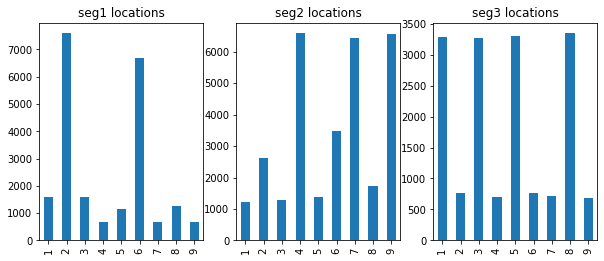

In [55]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,3,1)
plt.title('seg1 locations')

seg1['location'].value_counts(sort=False).plot.bar()
ax2 = plt.subplot(1,3,2)
plt.title('seg2 locations')

seg2['location'].value_counts(sort=False).plot.bar()
ax3 = plt.subplot(1,3,3)
plt.title('seg3 locations')

seg3['location'].value_counts(sort=False).plot.bar()
plt.show()

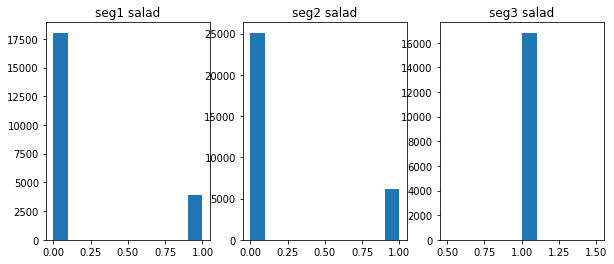

In [56]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,3,1)
plt.title('seg1 salad')
plt.hist(seg1['salad'])
ax2 = plt.subplot(1,3,2)
plt.hist(seg2['salad'])
plt.title('seg2 salad')
ax3 = plt.subplot(1,3,3)
plt.title('seg3 salad')
plt.hist(seg3['salad'])
plt.show()

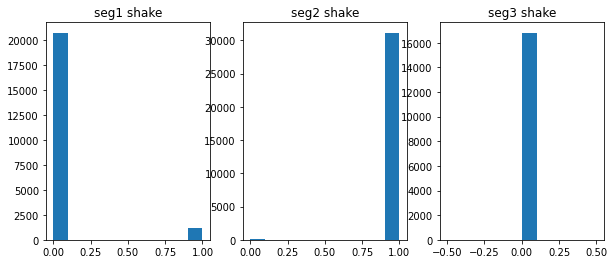

In [57]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,3,1)
plt.title('seg1 shake')
plt.hist(seg1['shake'])
ax2 = plt.subplot(1,3,2)
plt.title('seg2 shake')

plt.hist(seg2['shake'])
ax3 = plt.subplot(1,3,3)
plt.title('seg3 shake')

plt.hist(seg3['shake'])
plt.show()

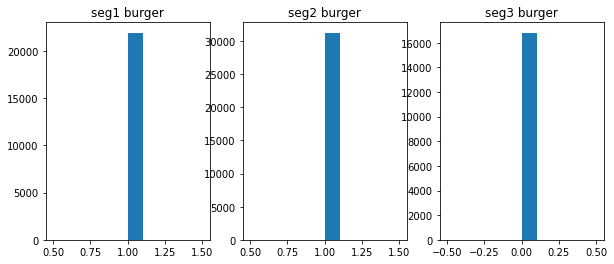

In [58]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,3,1)
plt.title('seg1 burger')
plt.hist(seg1['burger'])
ax2 = plt.subplot(1,3,2)
plt.title('seg2 burger')
plt.hist(seg2['burger'])
ax3 = plt.subplot(1,3,3)
plt.title('seg3 burger')

plt.hist(seg3['burger'])
plt.show()

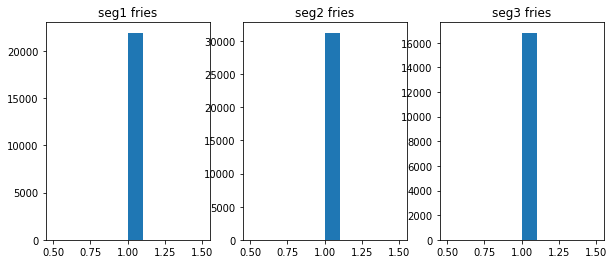

In [59]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,3,1)
plt.title('seg1 fries')

plt.hist(seg1['fries'])
ax2 = plt.subplot(1,3,2)
plt.title('seg2 fries')

plt.hist(seg2['fries'])
ax3 = plt.subplot(1,3,3)
plt.title('seg3 fries')

plt.hist(seg3['fries'])
plt.show()

In [60]:
s1_item=seg1['item_count'].mean()
s2_item=seg2['item_count'].mean()
s3_item=seg3['item_count'].mean()

In [61]:
s1_salad=seg1['salad'].mean()
s2_salad=seg2['salad'].mean()
s3_salad=seg3['salad'].mean()

s1_burger=seg1['burger'].mean()
s2_burger=seg2['burger'].mean()
s3_burger=seg3['burger'].mean()

s1_shake=seg1['shake'].mean()
s2_shake=seg2['shake'].mean()
s3_shake=seg3['shake'].mean()

s1_fries=seg1['fries'].mean()
s2_fries=seg2['fries'].mean()
s3_fries=seg3['fries'].mean()



In [62]:
itemdic={'segment':['segment 1','segment 2','segment 3'],
         'average purchase':[s1_item,s2_item,s3_item],
         'average burger':[s1_burger,s2_burger,s3_burger],
        'average salad':[s1_salad,s2_salad,s3_salad],
        'average fries':[s1_fries,s2_fries,s3_fries],
        'average shake':[s1_shake,s2_shake,s3_shake]}
itemdic=pd.DataFrame(itemdic)
itemdic

,segment,average purchase,average burger,average salad,average fries,average shake
0,segment 1,3.587420,1.0,0.177622,1.0,0.054691
1,segment 2,9.565387,1.0,0.196641,1.0,0.996577
2,segment 3,4.093953,0.0,1.000000,1.0,0.000000


In [149]:
gs1=s1_item/(s1_burger+s1_salad+s1_fries+s1_shake)
gs2=s2_item/(s2_burger+s2_salad+s2_fries+s2_shake)
gs3=s3_item/(s3_burger+s3_salad+s3_fries+s3_shake)

In [180]:
dic={'profile':['night owls','diners','white collar workers'] ,
     'types of meal':['snacks','dinner','lunch'],
     'preference':['location, convinience','quality, diversity','location, convinience, health, quality'],
     'estimated group size':[gs1,gs2,gs3],
     'total number of orders':[31380,44734,23886],
     'price conscious':['yes','no','yes']›
    }
dic=pd.DataFrame(dic)
dic=dic.T
dic.rename(columns={0:'segment 1',1:'segment 2',2:'segment 3'}, inplace=True)
dic

,segment 1,segment 2,segment 3
profile,night owls,diners,white collar workers
types of meal,snacks,dinner,lunch
preference,"location, convinience","quality, diversity","location, convinience, health, quality"
estimated group size,1.607041,2.995532,2.046976
total number of orders,31380,44734,23886
price conscious,yes,no,yes


In [188]:
revenue={'item':['salad','shake','burger','fries'],'cost':[0.5,0.5,1.5,0.25],
        'revenue':[4,3,5,2]}
profit=pd.DataFrame(revenue)
profit

,item,cost,revenue
0,salad,0.50,4
1,shake,0.50,3
2,burger,1.50,5
3,fries,0.25,2


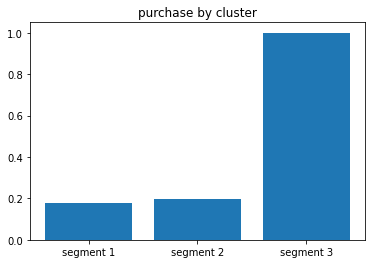

In [63]:
plt.bar(itemdic['segment'],itemdic['average salad'])
plt.title('purchase by cluster')
plt.show()

In [64]:
seg2

,ticket_id,time,location,item_count,burger,fries,salad,shake,date,weekday,hour,cluster
59320,['0x687689'],2019-01-01 00:06:00,6,5,1,1,0,1,2019-01-01,1,00:06:00,1
73112,['0x258d47'],2019-01-01 00:07:00,6,12,1,1,0,1,2019-01-01,1,00:07:00,1
92957,['0x610f5b'],2019-01-01 00:09:00,2,9,1,1,0,1,2019-01-01,1,00:09:00,1
70431,['0x5100ac'],2019-01-01 00:10:00,2,9,1,1,0,1,2019-01-01,1,00:10:00,1
35942,['0x277fba'],2019-01-01 00:15:00,8,10,1,1,1,0,2019-01-01,1,00:15:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
92159,['0x60eb9e'],2019-09-12 20:09:00,8,6,1,1,0,1,2019-09-12,3,20:09:00,1
53680,['0x376625'],2019-09-12 20:20:00,7,12,1,1,0,1,2019-09-12,3,20:20:00,1
61008,['0x737ce4'],2019-09-12 20:21:00,4,5,1,1,1,1,2019-09-12,3,20:21:00,1
84026,['0x155b9a'],2019-09-12 20:22:00,8,12,1,1,0,1,2019-09-12,3,20:22:00,1


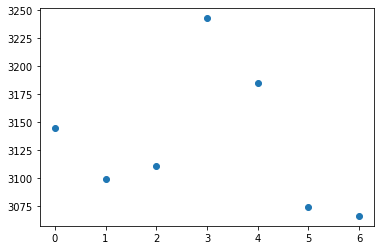

In [65]:
x=seg1['weekday'].value_counts().index
y=seg1['weekday'].value_counts()

#x=x.sort()
#y=y.sort()
plt.scatter(x,y)
plt.show()

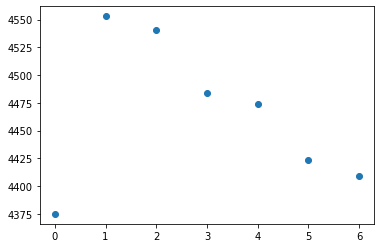

In [66]:
x=seg2['weekday'].value_counts().index
y=seg2['weekday'].value_counts()

#x=x.sort()
#y=y.sort()
plt.scatter(x,y)
plt.show()

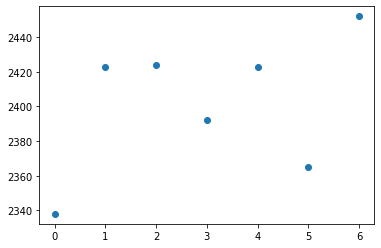

In [67]:
x=seg3['weekday'].value_counts().index
y=seg3['weekday'].value_counts()

#x=x.sort()
#y=y.sort()
plt.scatter(x,y)
plt.show()

In [68]:
itemdic

,segment,average purchase,average burger,average salad,average fries,average shake
0,segment 1,3.587420,1.0,0.177622,1.0,0.054691
1,segment 2,9.565387,1.0,0.196641,1.0,0.996577
2,segment 3,4.093953,0.0,1.000000,1.0,0.000000


In [203]:
x2=seg2['hour'].value_counts().index
x2

Index([18:49:00, 18:36:00, 18:21:00, 18:35:00, 18:46:00, 18:39:00, 18:34:00,
       18:16:00, 18:28:00, 18:23:00,
       ...
       22:58:00, 22:02:00, 21:43:00, 22:45:00, 21:47:00, 21:31:00, 14:41:00,
       22:06:00, 21:22:00, 01:59:00],
      dtype='object', length=825)

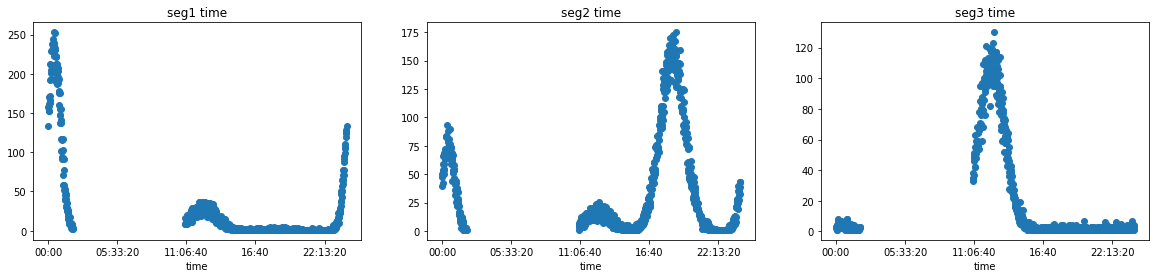

In [209]:
plt.figure(figsize=(20,4))
ax1 = plt.subplot(1,3,1)
plt.title('seg1 time')
pd.plotting.register_matplotlib_converters()
x=seg1['hour'].value_counts().index
y=seg1['hour'].value_counts()
plt.scatter(x,y)



ax2 = plt.subplot(1,3,2)
plt.title('seg2 time')
x2=seg2['hour'].value_counts().index
y2=seg2['hour'].value_counts()
plt.scatter(x2,y2)



ax3 = plt.subplot(1,3,3)
plt.title('seg3 time')

x3=seg3['hour'].value_counts().index
y3=seg3['hour'].value_counts()

plt.scatter(x3,y3)
plt.show()


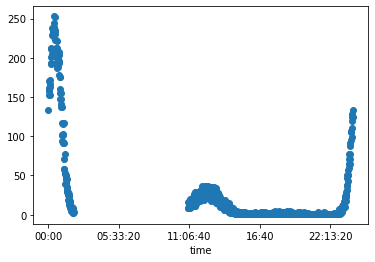

In [192]:
pd.plotting.register_matplotlib_converters()
x=seg1['hour'].value_counts().index
y=seg1['hour'].value_counts()

plt.scatter(x,y)
plt.show()

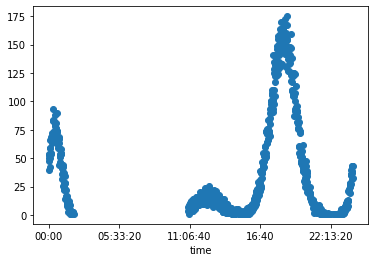

In [70]:
x=seg2['hour'].value_counts().index
y=seg2['hour'].value_counts()

plt.scatter(x,y)
plt.show()

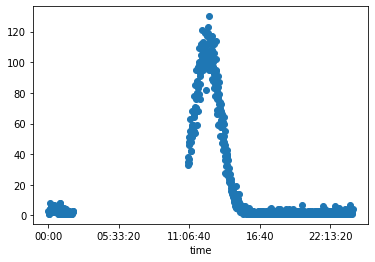

In [71]:
x=seg3['hour'].value_counts().index
y=seg3['hour'].value_counts()

plt.scatter(x,y)
plt.show()

<AxesSubplot:xlabel='location'>

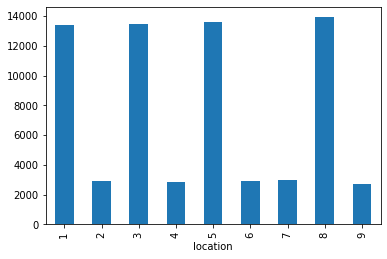

In [231]:
seg3.groupby('location').agg(sum)['item_count'].plot.bar()